# Parcial 3: 
### Curso: Metodos computacionales 
### Profesor: Hernán David Salinas Jiménez


La entrega del examen se debe realizar a traves del git-hub en el directorio de cada estudiante.


# Ecuaciones diferenciales


## Body Planet Orbits
1. (33%) Newton’s explanation of the motion of the planets in terms of a universal law of gravitation is one of the great achievements of science. He was able to prove that the planets traveled along elliptical paths with the sun at one vertex and to predict periods of the motion accurately. All Newton needed to postulate was that the force between a planet of mass $m$ and the sun of mass $M$ is

\begin{equation}
F^{(g)} = -\frac{GmM}{r^2}
\end{equation}

Here $r$ is the planet-CM distance, $G$ is the universal gravitational constant, and the attractive force lies along the line connecting the planet and the sun. The hard part for Newton was solving the resulting differential equations because he had to invent calculus to do it and then had go through numerous analytic manipulations. The numerical solution is straightforward since even for planets the equation of motion is still

\begin{equation}
\vec{f}=m\vec{a} = m \frac{\mathrm{d}^2\vec{r}}{\mathrm{d}t^2}
\end{equation}

with the force having components:

\begin{equation}
f_x  = F^{(g)}\cos \theta =  F^{(g)}\frac{x}{r}
\end{equation}


\begin{equation}
f_y  = F^{(g)}\sin \theta =  F^{(g)}\frac{y}{r}
\end{equation}

where 

\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}



The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.



In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Usamos el metodo de euler para encontrar la solucion de las ecuaciones diferenciales

In [ ]:
#solucion a

In [118]:
def solution(x0, y0, vx0, vy0, n):
  

  #creamos un array donde se van almacenar las soluciones

  v_x = np.zeros(n)
  v_y = np.zeros(n)
  x = np.zeros(n)
  y = np.zeros(n)

  #damos las condiciones iniciales

  v_x[0] = vx0
  v_y[0] = vy0
  x[0] = x0
  y[0] = y0

  #definimos algunas constantes y el intervalo de tiempo

  GM = 1
  
  dt = 0.01

#Por el metodo de euler encontramos las soluciones

  for i in range(0, n-1):

    r = np.sqrt(x[i]** 2 + y[i]** 2)

    v_x[i+1] = v_x[i] + (-GM * x[i] / r**3) * dt
    v_y[i+1] = v_y[i] + (-GM * y[i] / r**3) * dt

    x[i+1] = x[i] + v_x[i+1]*dt
    
    y[i+1] = y[i] + v_y[i+1]*dt 

  return x, y

In [128]:
solucion = solution(0.5, 0, 0, 1.63, 1000)
t = np.linspace(0,10,1000)
sol_x = solucion[0]
sol_y = solucion[1]

In [ ]:
#solucion b

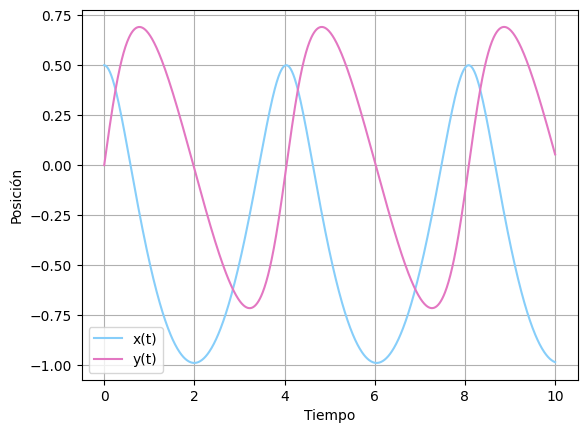

In [140]:
#Graficamos

plt.plot(t, sol_x,'#87CEFA', label='x(t)')
plt.plot(t, sol_y, '#e377c2', label='y(t)')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()
plt.grid()

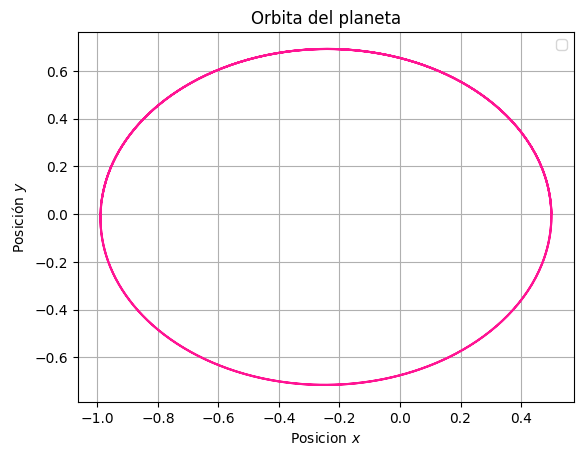

In [133]:
plt.plot(sol_x, sol_y, '#FF1493')
plt.xlabel('Posicion $x$')
plt.ylabel('Posición $y$')
plt.title('Orbita del planeta')
plt.legend()
plt.grid()


### Integracion 
2. (33%) Las [integrales elipticas](https://es.wikipedia.org/wiki/Integral_el%C3%ADptica#:~:text=Una%20integral%20el%C3%ADptica%20de%20primera,segundas%20dependen%20de%20dos%20variables) son integrales que permite dar solución a múltiples problemas en física y matemáticas. Algunos ejemplos de su uso, pueden ser encontrados en las siguientes referencias [[1]](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html)
[[2]](http://www.sc.ehu.es/sbweb/fisica_/numerico/integral/eliptica_ejemplos.html). El siguiente problema esta relacionado con al integración eliptica.


La [longitud de arco](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html) de  una elipse puede ser calculada a través de la siguiente integral.

\begin{equation}
L(k) = 4a\int_0^{\pi/2}  \mathrm{d} \phi \sqrt{1-k^2\sin^2 \phi}
\end{equation}

donde $ k^2 = \frac{a^2-b^2}{a^2} = \epsilon $, siendo $\epsilon$ la excentricidad de la elipse, a y b el semieje mayor y menor de la elipse respectivamente, $a>b$.

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

2. Determine la longitud de arco de la solucion del problema 1.



In [82]:
from scipy.integrate import quad

In [ ]:
#solucion 01

In [86]:
#Valores iniciales

b = 1
a = np.linspace(1,100,100)

#Construimos la funcion

def longi_integral(phi, a):

  b = 1

  k = (a**2 - b**2) / a**2

  y = np.sqrt(1 - (k**2) * (np.sin(phi))** 2)

  return y

In [88]:
#Calculamos la integral

l_arco = []

for i in a:

  inte, _ = quad(longi_integral, 0, np.pi/2, args = (i,))
  total = 4 * i * inte

  l_arco.append(total)

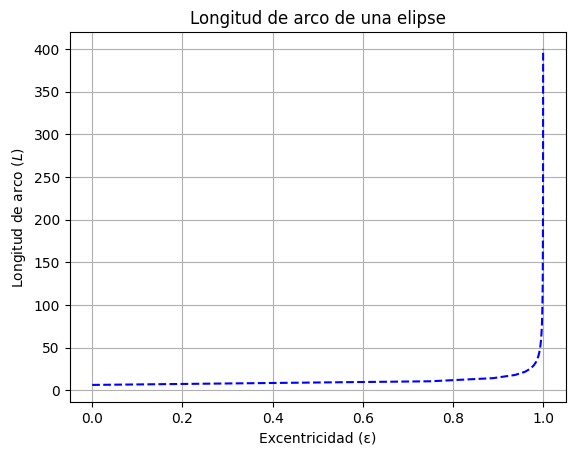

In [90]:
# Gráfico

plt.plot((a**2 - b**2) / a**2, l_arco, "b--")
plt.xlabel('Excentricidad (ε)')
plt.ylabel('Longitud de arco ($L$)')
plt.title('Longitud de arco de una elipse')
plt.grid()

In [ ]:
#solcuion 02

In [151]:
from scipy.misc import derivative
import sympy as sp
from scipy.integrate import trapz

La longitud de arco del planeta se encuentra utilizando la siguiente formula.

\begin{equation}
L = \int_{t_1}^{t_2} \sqrt{\left(\frac{{dx}}{{dt}}\right)^2 + \left(\frac{{dy}}{{dt}}\right)^2} \, dt
\end{equation}

Como vemos tenemos las posiciones en x y en y tendremos que derivar respecto a al tiempo y luego integrar, utilizamos que la integral es la suma de riemman asi como tenemos cierta cantidad de datos de la orbita del planeta sumamos estos y ecnontramos la longitud de arco de la elipse de la orbita del planeta

In [154]:
def planet_arco(x, y):

  dx = np.diff(x)
  dy = np.diff(y)

  ds = np.sqrt(dx**2 + dy**2)

  return np.sum(ds)

arco_pl = planet_arco(sol_x, sol_y)

print('La longitud de arco de la elipse de la orbita del planeta del primer punto es:',arco_pl)

La longitud de arco de la elipse de la orbita del planeta del primer punto es: 11.299699467965743



### Matrices: Rotación  en el plano, autovalores y autovectores
3 (33%).   Considere la siguiente matrix de rotación:
\begin{bmatrix} 
\cos \theta & -\sin \theta\\ 
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución. 

Encontrar los autovalores y autovectores para $\theta=45$.

In [103]:
#Definimos la matriz

theta = np.deg2rad(45)

A = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
A

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [104]:
#Encontramos el polinomio caracteristico

poli = np.poly(A)
poli

array([ 1.        , -1.41421356,  1.        ])

In [105]:
#Encontramos lo autovalores y autovectores

P = np.linalg.eigh(A)

auto_valores = P[0]
auto_vectores = P[1]

print('Los autovalores de A son:',auto_valores)
print('Los autovectores de A son:',auto_vectores)

Los autovalores de A son: [1.11022302e-16 1.41421356e+00]
Los autovectores de A son: [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [106]:
#Le sacamos la inversa a los autovectores

auto_vecto_inv = np.linalg.inv(auto_vectores)
auto_vecto_inv

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [108]:
#Usamos la formula de la matriz diagonal

diago = auto_vecto_inv @ A @ auto_vectores
print('La matriz diagonal de la matriz rotacion es:', diago)

La matriz diagonal de la matriz rotacion es: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
